In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [41]:
data = pd.read_csv('../titanic.csv')
pd.set_option('display.max_rows', None)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [42]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [43]:
data['cabin'].isnull().mean()

np.float64(0.774637127578304)

In [44]:
data['letter'] = data['cabin'].str.extract('([A-Za-z]+)')
data['letter'].head()

0    B
1    C
2    C
3    C
4    C
Name: letter, dtype: object

In [45]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C


In [46]:
data['letter'].unique()

array(['B', 'C', 'E', 'D', 'A', nan, 'T', 'F', 'G'], dtype=object)

In [47]:
#data['letter'].fillna('nan', inplace=True)
data.fillna({'letter': 'nan'}, inplace=True)
data['letter'].unique()

array(['B', 'C', 'E', 'D', 'A', 'nan', 'T', 'F', 'G'], dtype=object)

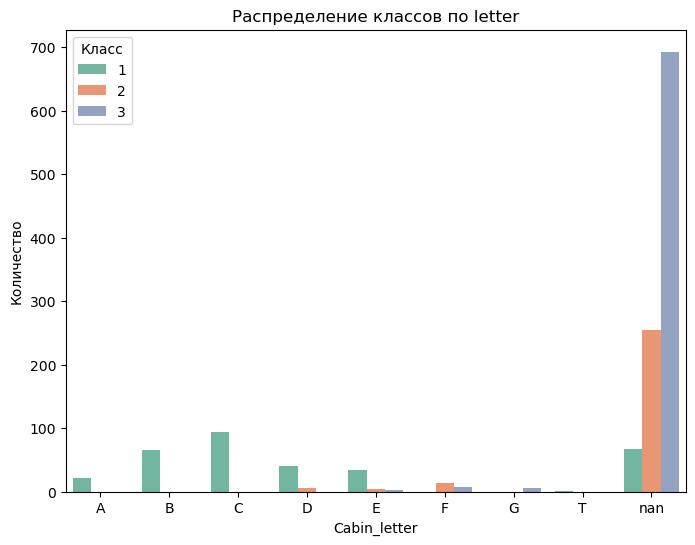

In [48]:
plt.figure(figsize=(8, 6))

order = sorted(data['letter'].unique())
sns.countplot(data=data, x='letter', hue='pclass', palette='Set2', order=order)

plt.title("Распределение классов по letter")
plt.xlabel("Cabin_letter")
plt.ylabel("Количество")
plt.legend(title="Класс")
plt.show()

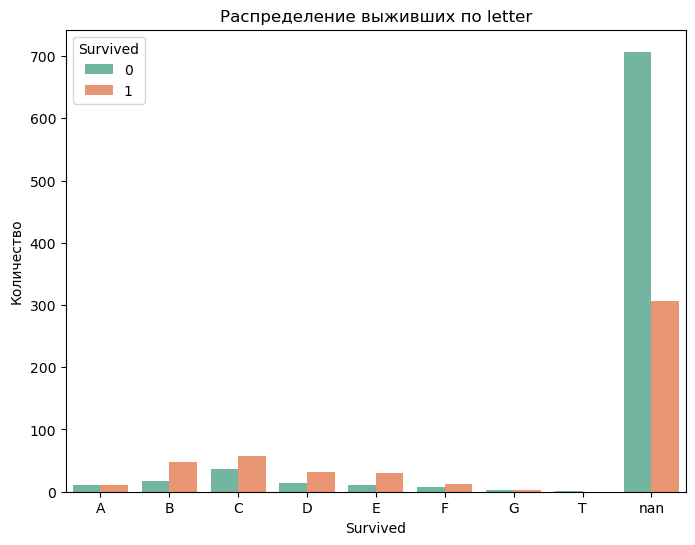

In [49]:
plt.figure(figsize=(8, 6))
order = sorted(data['letter'].unique())
sns.countplot(data=data, x='letter', hue='survived', palette='Set2', order=order)

plt.title("Распределение выживших по letter")
plt.xlabel("Survived")
plt.ylabel("Количество")
plt.legend(title="Survived")
plt.show()

In [50]:
data['cabin_known'] = data['cabin'].notnull().astype(int)

In [51]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter,cabin_known
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",C,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C,1


In [52]:
data['letter'] = data['letter'].replace({
    'A': 'ABC', 
    'B': 'ABC',
    'C': 'ABC',
    'D': 'DE',
    'E': 'DE',
    'F': 'FG',
    'G': 'FG',
    'T': 'nan'
})

In [53]:
data['letter'].unique()

array(['ABC', 'DE', 'nan', 'FG'], dtype=object)

In [54]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter,cabin_known
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",ABC,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",ABC,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",ABC,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1


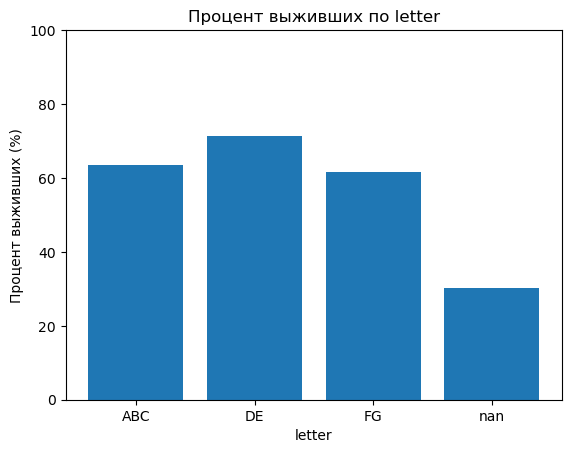

In [55]:
survival_by_letter = data.groupby('letter')['survived'].mean().sort_index() * 100

plt.bar(survival_by_letter.index, survival_by_letter.values)
plt.xlabel('letter')
plt.ylabel('Процент выживших (%)')
plt.title('Процент выживших по letter')
plt.ylim(0, 100) 
plt.show()

## делим пассажиров на тех, у кого указан 'cabin' и на тех, у кого нет

In [56]:
data.isnull().sum()

pclass            0
survived          0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
boat            823
body           1188
home.dest       564
letter            0
cabin_known       0
dtype: int64

In [57]:
data_age_mis = data[data['age'].isna()]

In [58]:
data_age_mis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 15 to 1305
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       263 non-null    int64  
 1   survived     263 non-null    int64  
 2   name         263 non-null    object 
 3   sex          263 non-null    object 
 4   age          0 non-null      float64
 5   sibsp        263 non-null    int64  
 6   parch        263 non-null    int64  
 7   ticket       263 non-null    object 
 8   fare         263 non-null    float64
 9   cabin        23 non-null     object 
 10  embarked     263 non-null    object 
 11  boat         69 non-null     object 
 12  body         1 non-null      float64
 13  home.dest    60 non-null     object 
 14  letter       263 non-null    object 
 15  cabin_known  263 non-null    int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 34.9+ KB


In [59]:
data['title'] = data.name.str.extract(' ([A-Za-z]+)\.')

In [60]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter,cabin_known,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",ABC,1,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",ABC,1,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Mrs


In [61]:
pd.crosstab(data['title'], data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


Capt - Captain/Капитан  
Col - Colonel/Полковник  
Countess - Графиня  
Don - обращение к мужчине  
Dona - обращение к замужней женщине  
Dr - Доктор  
Jonkheer - Йонкер(низкий ранг в дворянстве)  
Lady - возможно британский титул  
Maijor - Майор  
Master - обращение к мальчику, подростку  
Miss - обращение к назамужней женщине  
Mlle - mademoiselle, обращение к назамужней женщине  
Mme - Madame, обращение к замужней женщине  
Mr - обращение к мужчине  
Mrs - обращение к замужней женщине  
Ms - обращение к женщине, если не известно замужем или нет  
Rev - Revered/Преподобный  
Sir - титул

## cabin?

In [62]:
cabin_B5 = data[data['cabin'] == 'B5']
cabin_B5

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter,cabin_known,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",ABC,1,Miss
193,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,2,NaN,"St Louis, MO",ABC,1,Miss


In [63]:
cabin_C22 = data[data['cabin'] == 'C22']
cabin_C22

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter,cabin_known,title
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.55,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",ABC,1,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Mrs


In [64]:
cabin_C62 = data[data['cabin'] == 'C62']
cabin_C62

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter,cabin_known,title
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62,C,NaN,124.0,"New York, NY",ABC,1,Col
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62,C,4,NaN,"New York, NY",ABC,1,Mrs


## несколько человек в одной  каюте по одному билету, цена указана за каюту, а не за человека. создаем столбец цена билена за одного человека, поделив цену билета на количество человек в семье.

## ticket/family

In [79]:
data['family'] = data['sibsp'] + data['parch'] + 1
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter,cabin_known,title,family
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",ABC,1,Miss,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Master,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Miss,4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",ABC,1,Mr,4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Mrs,4


In [80]:
data['fare_per_prsn'] = data['fare'] / data['family']
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,letter,cabin_known,title,family,fare_per_prsn
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",ABC,1,Miss,1,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Master,4,37.8875
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Miss,4,37.8875
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",ABC,1,Mr,4,37.8875
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",ABC,1,Mrs,4,37.8875
